In [3]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

import librosa
import matplotlib.pyplot as plt

2.3.0.dev20240309
2.2.0.dev20240309


In [4]:
from proccesing_dataset import UrbanSoundDataset

In [5]:
import torch
if torch.cuda.is_available():
        device = "cuda"
else:
        device = "cpu"
print(f"Using {device}")

Using cpu


In [6]:
annotation_file = "./data/metadata/UrbanSound8K.csv"
audio_dir = "./data/audio"
sample_rate = 16000
num_samples = 16000

mel_specgram = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                    n_fft=1024,
                                                    n_mels=64,
                                                    ).to(torch.float32).to(device)




In [7]:
data = UrbanSoundDataset(annotations_file=annotation_file,
                         audio_dir=audio_dir,
                         transformation=mel_specgram,
                         target_sample_rate=sample_rate,
                         num_samples=num_samples,
                         device=device)



In [8]:
signal, label = data[60]
print (signal.shape, label)

a=1

torch.Size([1, 64, 32]) 2


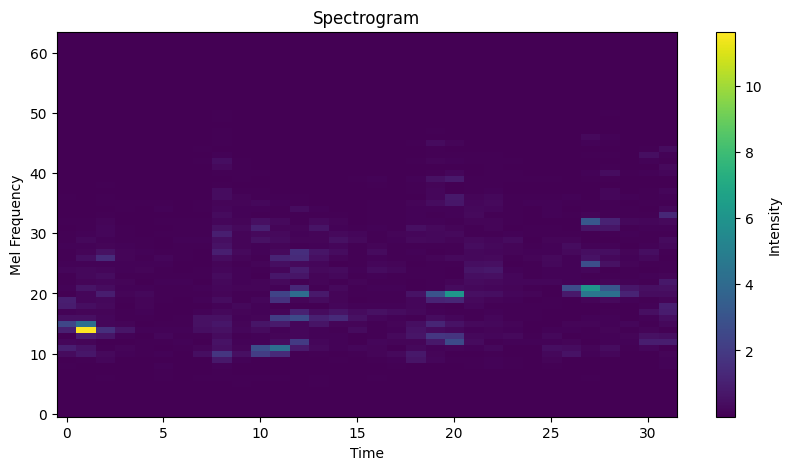

In [9]:
import matplotlib.pyplot as plt
import torch

# Assuming you already have a tensor with shape (1, 64, 32)
spectrogram_tensor = signal # Replace this with your actual tensor

# Select the spectrogram slice
spectrogram_cpu = spectrogram_tensor.to('cpu')

# Convert the tensor to a numpy array
spectrogram_np = spectrogram_cpu.squeeze(0).numpy().astype('float32')

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.imshow(spectrogram_np, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')
plt.title('Spectrogram')
plt.show()



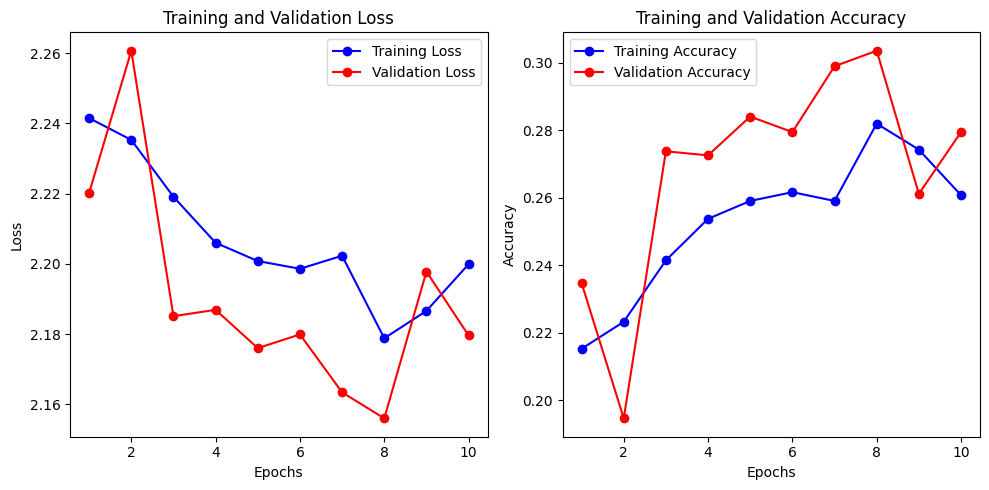

In [10]:
import matplotlib.pyplot as plt

train_loss_values = [2.2415, 2.2353, 2.2191, 2.2060, 2.2008, 2.1986, 2.2023, 2.1788, 2.1866, 2.1999]
train_accuracy_values = [0.2153, 0.2233, 0.2415, 0.2538, 0.2591, 0.2617, 0.2591, 0.2820, 0.2743, 0.2608]

val_loss_values = [2.2202, 2.2607, 2.1851, 2.1869, 2.1760, 2.1799, 2.1634, 2.1560, 2.1978, 2.1796]
val_accuracy_values = [0.2348, 0.1947, 0.2738, 0.2726, 0.2841, 0.2795, 0.2990, 0.3036, 0.2612, 0.2795]

epochs = range(1, len(train_loss_values) + 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_values, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
